In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv("../scraping/emissoes.csv")

# Renomear colunas caso haja erros
df.rename(columns={
    "Opereção": "Operacao",  # Corrige se vier errado
    "Cod.Cetip": "Codigo CETIP"
}, inplace=True)

# Visualizar colunas
print(df.columns.tolist())
df.head()


['Ano', 'Empresa (Operação)', 'NumeroEmissao', 'Serie', 'Cod ISIN', 'Valor']


,Ano,Empresa (Operação),NumeroEmissao,Serie,Cod ISIN,Valor
0,2025,Mantiqueira Brasil,404ª,1-2-3,"CRA0000000, CRA0000000, CRA0000000",500000000.0
1,2025,Alair Ribeiro Fernandes,290ª,1,CRA0250066E,100000000.0
2,2025,Pirapitinga LTDA,401ª,1-2,"CRA0000000000, CRA0000000000",250000000.0
3,2025,Lar Cooperativa Agroindustrial,405ª,1-2-3-4,"CRA000000000, CRA000000000, CRA000000000, CRA0...",700000000.0
4,2025,Agrícola Panorama Comércio e Representações LTDA,400ª,1-2-3,"CRA025004XT, CRA025004XU, CRA025004XV",50000000.0


In [6]:
# Converter a coluna de valor para numérico
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

# Verificar valores nulos
print(df.isnull().sum())


Ano                   0
Empresa (Operação)    0
NumeroEmissao         0
Serie                 0
Cod ISIN              0
Valor                 4
dtype: int64


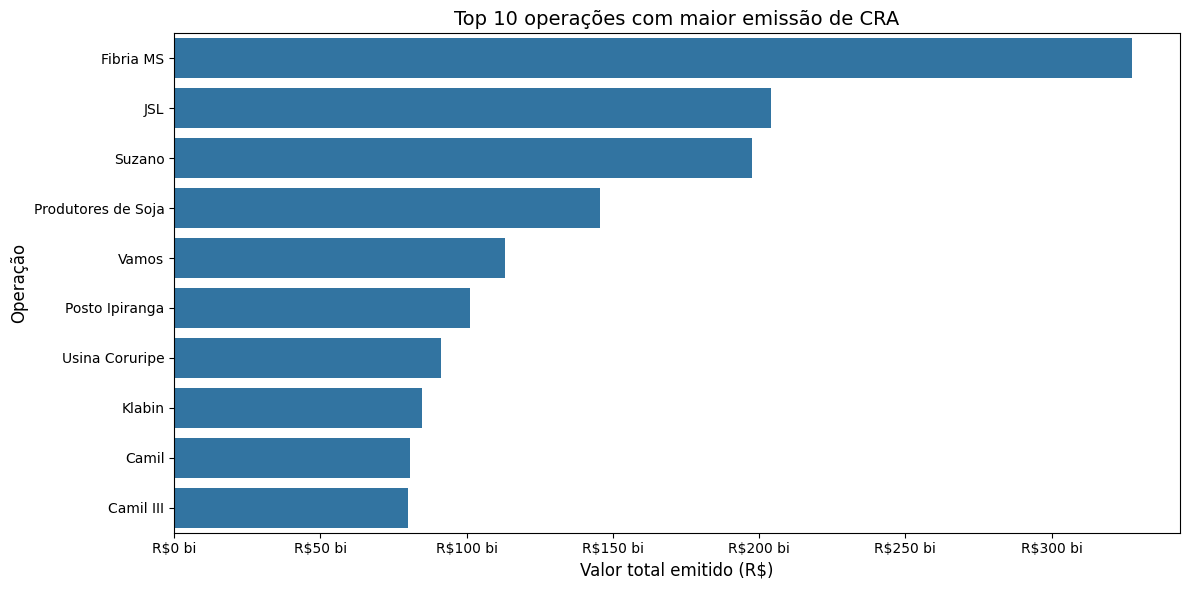

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 6))
top_operacoes = df.groupby("Empresa (Operação)")["Valor"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_operacoes.values, y=top_operacoes.index)

plt.title("Top 10 operações com maior emissão de CRA", fontsize=14)
plt.xlabel("Valor total emitido (R$)", fontsize=12)
plt.ylabel("Operação", fontsize=12)

plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'R${x/1e9:,.0f} bi'))

plt.tight_layout()
plt.show()


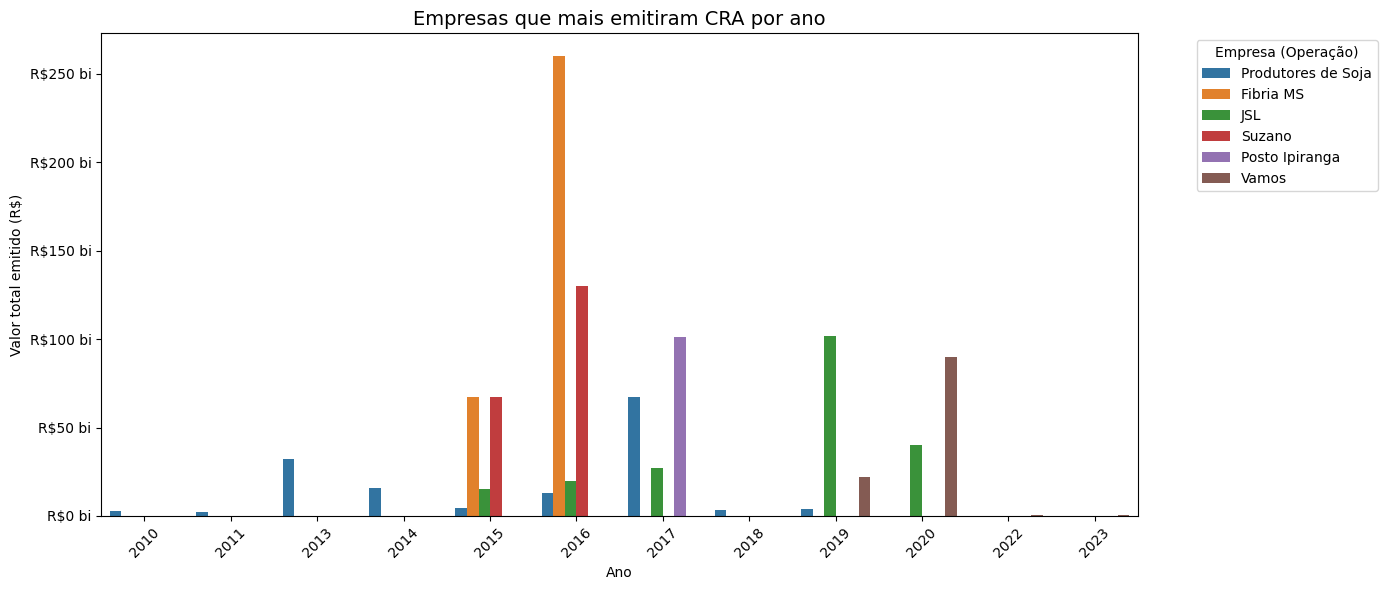

In [19]:
# Garantir que os nomes das colunas estão corretos
df.rename(columns={
    "Cod.Cetip": "Cod ISIN",  # Se necessário
}, inplace=True)

# Converter valores
df["Valor"] = pd.to_numeric(df["Valor"], errors="coerce")
df["Ano"] = df["Ano"].astype(str)

# Agrupar valor total emitido por empresa e ano
agrupado = df.groupby(["Ano", "Empresa (Operação)"])["Valor"].sum().reset_index()

# Filtrar top 6 empresas no total acumulado
top_empresas = (
    agrupado.groupby("Empresa (Operação)")["Valor"]
    .sum()
    .sort_values(ascending=False)
    .head(6)
    .index.tolist()
)

# Filtrar os dados apenas das top empresas
df_top = agrupado[agrupado["Empresa (Operação)"].isin(top_empresas)]

# Plot: barras agrupadas por ano
plt.figure(figsize=(14, 6))
sns.barplot(data=df_top, x="Ano", y="Valor", hue="Empresa (Operação)")

plt.title("Empresas que mais emitiram CRA por ano", fontsize=14)
plt.ylabel("Valor total emitido (R$)")
plt.xlabel("Ano")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'R${x/1e9:,.0f} bi'))
plt.legend(title="Empresa (Operação)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


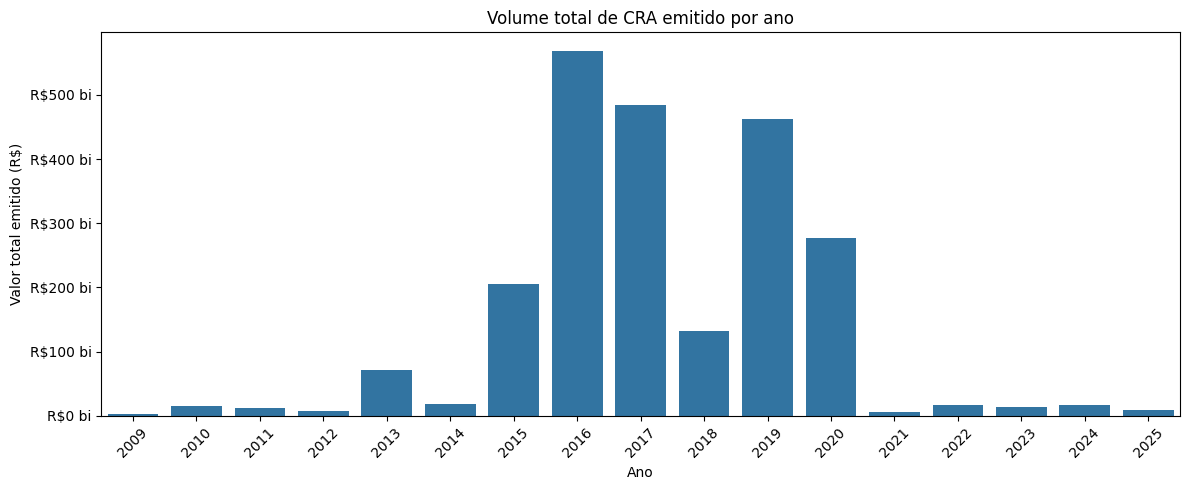

In [20]:
plt.figure(figsize=(12, 5))
emissao_por_ano = df.groupby('Ano')['Valor'].sum().reset_index()

sns.barplot(data=emissao_por_ano, x='Ano', y='Valor')
plt.title("Volume total de CRA emitido por ano")
plt.ylabel("Valor total emitido (R$)")
plt.xlabel("Ano")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'R${x/1e9:.0f} bi'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


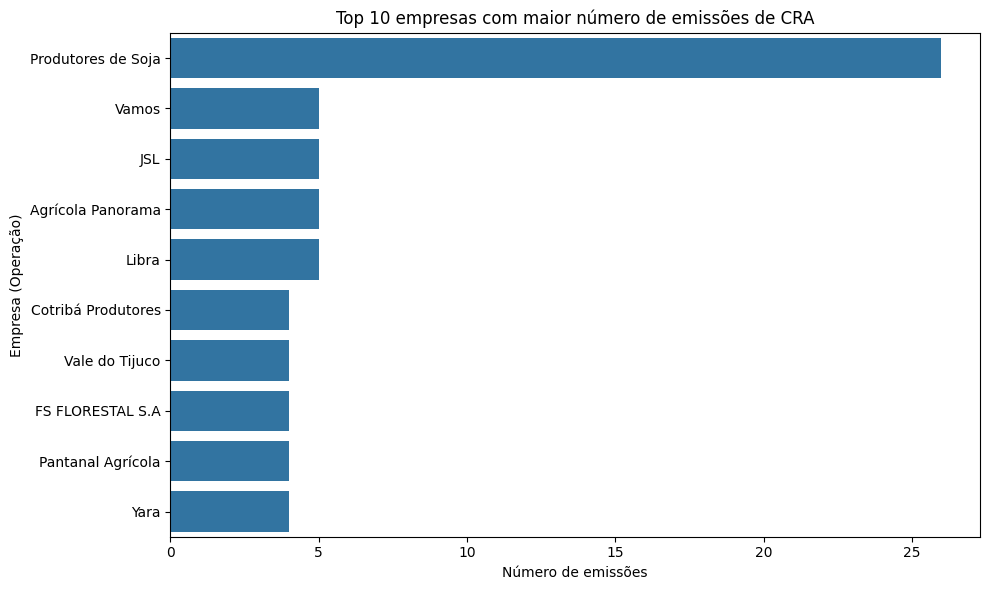

In [22]:
quantidade_emissoes = df.groupby("Empresa (Operação)")["Cod ISIN"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=quantidade_emissoes.values, y=quantidade_emissoes.index)
plt.title("Top 10 empresas com maior número de emissões de CRA")
plt.xlabel("Número de emissões")
plt.tight_layout()
plt.show()